In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [19]:
from google.colab import files
uploaded = files.upload()

Saving IMG_4741.JPG to IMG_4741.JPG


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
file_path = 'https://drive.google.com/drive/folders/1rpswJPTdFEPoBmLsKfuadANkAS8mmKse?usp=drive_link'

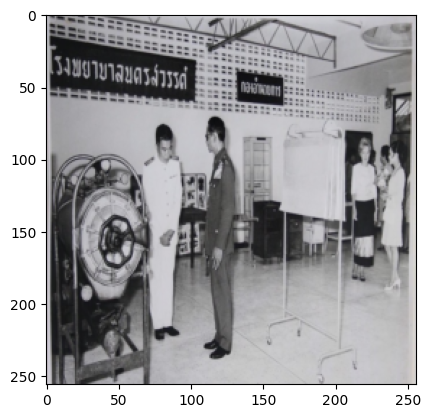

In [22]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# โหลดภาพจากไฟล์
image = imread('IMG_4741.JPG')  # ถ้าใช้ Google Drive ต้องใช้ path ที่เชื่อมต่อกับ Drive
image_resized = resize(image, (256, 256))

# แสดงผลภาพ
plt.imshow(image_resized)
plt.show()

In [27]:
# ตรวจสอบไฟล์ใน My Drive
print(os.listdir('/content/drive/My Drive'))

# หากเจอ Test-corolyzer ลองเข้าไปในโฟลเดอร์
print(os.listdir('/content/drive/My Drive/Test-corolyzer'))

['แมวหาย.docx', 'Type1_AdditonalCoverage.pdf', '2020.11.25-pawabiz-2020q3-a4-nl.pdf', 'collins.j_report.pdf', 'ใบสมัครตัวแทน นายหน้าประกันวินาศภัย.pdf', 'Cheetah.pptx', 'Cheetah_SF.xd', 'ใบจองชื่อ.pdf', 'เอกราช.pdf', 'ไฟล์_000.txt', 'Q&A', 'Startup', 'Rate', 'สถิติ', 'บริษัทเรา.docx', 'CB85D5EF-442B-4EF1-BA44-EED4242D464F.png', 'JavaScript Project', 'การบันทึกหน้าจอ 2565-02-04 เวลา 09.11.26 (1).mov', 'การบันทึกหน้าจอ 2565-02-04 เวลา 09.11.26.mov', 'โปรเจค แบบฝึกหัดการเขียน PHPทุกEP.rar', 'สำเนาของ ข้อมูลตัวแทนจำหน่าย\n (2).gsheet', 'สำเนาของ ข้อมูลตัวแทนจำหน่าย\n (1).gsheet', 'appsheet', 'carData_Images', 'carService.gsheet', 'customer_Images', 'Employee_Images', 'ppservice.gsheet', 'ประวัติการทำงาน.gdoc', 'users.png', 'IMG_3572.jpg', 'สำเนาบัตรประชาชน.jpg', 'สำเนาทะเบียนบ้าน.jpg', 'resumeอภิเชษฐ์.png', 'resume-อภิเชษฐ์.png', 'Transcript.jpg', 'Transcript1.jpg', '8. Netflix Dataset.csv', '8. Netflix Dataset.gsheet', 'ใบสมัครงาน_บริษัท ประกันภัยไทยวิวัฒน์ จำกัด (มหาชน).pdf', 'Resume-อภิ

In [28]:
image_path = '/content/drive/My Drive/Test-corolyzer/IMG_4741.JPG'

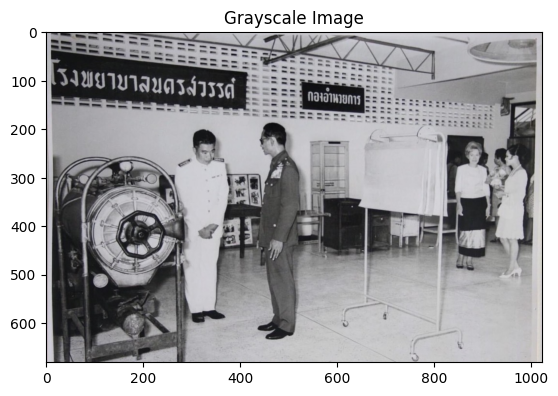

In [29]:
from skimage.io import imread
import matplotlib.pyplot as plt

# Path ของไฟล์ที่ถูกต้อง
image_path = '/content/drive/My Drive/Test-corolyzer/IMG_4741.JPG'

# โหลดภาพ
grayscale_image = imread(image_path)

# แสดงภาพขาวดำต้นฉบับ
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

In [30]:
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input, BatchNormalization
from tensorflow.keras.models import Model

def create_colorization_model():
    input_layer = Input(shape=(256, 256, 1))  # Grayscale input (L channel)

    # Encoder
    x = Conv2D(64, (3, 3), activation="relu", padding="same")(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same", strides=2)(x)  # Downsample
    x = BatchNormalization()(x)

    x = Conv2D(256, (3, 3), activation="relu", padding="same", strides=2)(x)  # Downsample
    x = BatchNormalization()(x)

    # Decoder
    x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)  # Upsample

    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)  # Upsample

    # Output layer (predicting the ab channels)
    output_layer = Conv2D(2, (3, 3), activation="tanh", padding="same")(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer="adam", loss="mse")

    return model

# สร้างโมเดล
model = create_colorization_model()

In [31]:
from skimage.transform import resize
import numpy as np

# Resize ภาพให้เป็นขนาด 256x256
grayscale_image_resized = resize(grayscale_image, (256, 256))

# เตรียมภาพขาวดำเป็นช่อง L สำหรับโมเดล
X = grayscale_image_resized[:, :, 0].reshape((256, 256, 1))

# Predict สีด้วยโมเดล (ช่อง ab)
ab_output = model.predict(X[np.newaxis, ...])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


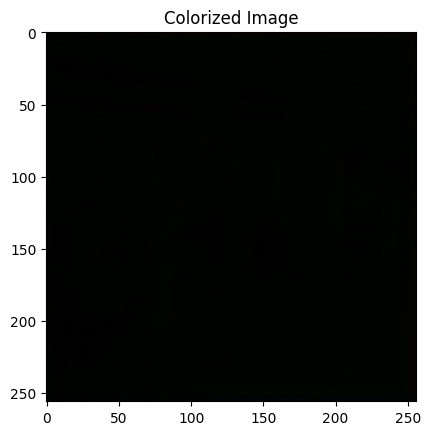

In [32]:
from skimage.color import lab2rgb

def colorize_image(grayscale_input, ab_output):
    lab_image = np.zeros((grayscale_input.shape[0], grayscale_input.shape[1], 3))
    lab_image[:, :, 0] = grayscale_input[:, :, 0]  # L channel (grayscale)
    lab_image[:, :, 1:] = ab_output * 128  # Denormalize ab channels
    rgb_image = lab2rgb(lab_image)
    return rgb_image

# แปลงภาพขาวดำเป็นภาพสี
colorized_image = colorize_image(X, ab_output)

# แสดงผลภาพสีที่ได้
plt.imshow(colorized_image)
plt.title('Colorized Image')
plt.show()

In [33]:
print("Shape of ab_output:", ab_output.shape)
print("Min value in ab_output:", ab_output.min())
print("Max value in ab_output:", ab_output.max())

Shape of ab_output: (256, 256, 2)
Min value in ab_output: -0.03712006
Max value in ab_output: 0.0473817


In [34]:
def colorize_image(grayscale_input, ab_output):
    lab_image = np.zeros((grayscale_input.shape[0], grayscale_input.shape[1], 3))
    lab_image[:, :, 0] = grayscale_input[:, :, 0]  # L channel (grayscale)
    lab_image[:, :, 1:] = ab_output * 128  # Denormalize ab channels
    rgb_image = lab2rgb(lab_image)
    return rgb_image

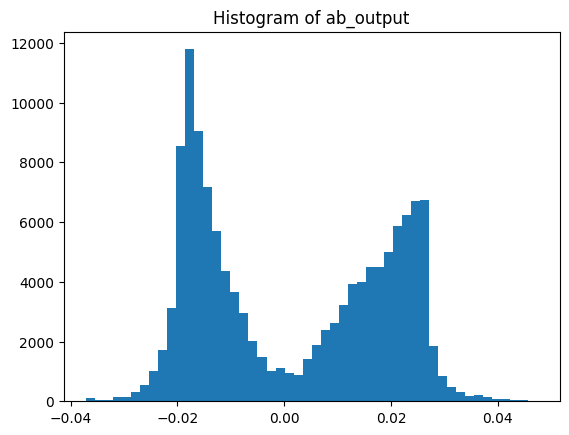

In [35]:
import matplotlib.pyplot as plt

plt.hist(ab_output.flatten(), bins=50)
plt.title('Histogram of ab_output')
plt.show()

In [36]:
def colorize_image(grayscale_input, ab_output):
    lab_image = np.zeros((grayscale_input.shape[0], grayscale_input.shape[1], 3))
    lab_image[:, :, 0] = grayscale_input[:, :, 0]  # L channel (grayscale)
    lab_image[:, :, 1:] = ab_output * 128  # Denormalize ab channels
    rgb_image = lab2rgb(lab_image)
    return rgb_image

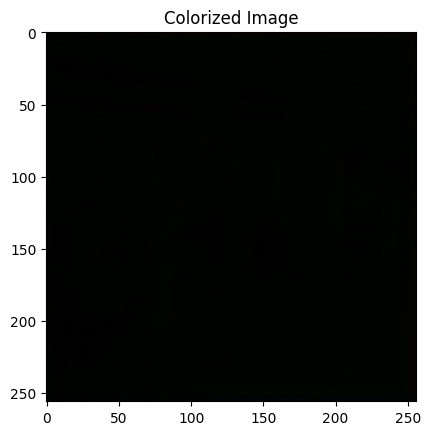

In [37]:
# แปลงภาพขาวดำเป็นภาพสี
colorized_image = colorize_image(X, ab_output)

# แสดงผลภาพสีที่ได้
plt.imshow(colorized_image)
plt.title('Colorized Image')
plt.show()

In [38]:
# ตรวจสอบค่าหลังการ denormalize
ab_output_denormalized = ab_output * 128
print("Min value in ab_output_denormalized:", ab_output_denormalized.min())
print("Max value in ab_output_denormalized:", ab_output_denormalized.max())

Min value in ab_output_denormalized: -4.7513676
Max value in ab_output_denormalized: 6.0648575


In [39]:
# Resize ภาพขาวดำให้เป็นขนาด 256x256
grayscale_image_resized = resize(grayscale_image, (256, 256))

# เตรียมภาพสำหรับการป้อนเข้าโมเดล
X = grayscale_image_resized[:, :, 0].reshape((256, 256, 1))

In [40]:
!git clone https://github.com/jantic/DeOldify.git DeOldify
!pip install -r DeOldify/requirements-colab.txt
from DeOldify import device
from DeOldify.visualize import *

# โหลดโมเดล
colorizer = get_image_colorizer(artistic=True)

# โหลดและแปลงภาพ
image_path = '/content/drive/My Drive/Test-corolyzer/IMG_4741.JPG'
colorizer.plot_transformed_image(image_path, render_factor=35)

Cloning into 'DeOldify'...
remote: Enumerating objects: 2615, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 2615 (delta 91), reused 204 (delta 71), pack-reused 2346 (from 1)
Receiving objects: 100% (2615/2615), 69.71 MiB | 25.29 MiB/s, done.
Resolving deltas: 100% (1174/1174), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 23.0 MB/s eta 0:00:

ImportError: cannot import name 'device' from 'DeOldify' (unknown location)

In [41]:
!git clone https://github.com/jantic/DeOldify.git DeOldify
!pip install -r DeOldify/requirements-colab.txt

fatal: destination path 'DeOldify' already exists and is not an empty directory.


In [48]:
import os
os.chdir('DeOldify')

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import os
print(os.getcwd())  # ตรวจสอบว่าคุณอยู่ในโฟลเดอร์ DeOldify หรือไม่

/content/DeOldify


In [55]:
import sys
sys.path.append('/content/DeOldify')

In [57]:
!ls DeOldify

ls: cannot access 'DeOldify': No such file or directory


In [58]:
!find . -name "*.py"

./fid/inception.py
./fid/fid_score.py
./fastai/imports/__init__.py
./fastai/imports/torch.py
./fastai/imports/core.py
./fastai/callbacks/csv_logger.py
./fastai/callbacks/lr_finder.py
./fastai/callbacks/general_sched.py
./fastai/callbacks/__init__.py
./fastai/callbacks/loss_metrics.py
./fastai/callbacks/tensorboard.py
./fastai/callbacks/hooks.py
./fastai/callbacks/misc.py
./fastai/callbacks/one_cycle.py
./fastai/callbacks/rnn.py
./fastai/callbacks/mixup.py
./fastai/callbacks/fp16.py
./fastai/callbacks/mlflow.py
./fastai/callbacks/oversampling.py
./fastai/callbacks/mem.py
./fastai/callbacks/tracker.py
./fastai/__init__.py
./fastai/basic_data.py
./fastai/metrics.py
./fastai/sixel.py
./fastai/distributed.py
./fastai/core.py
./fastai/basic_train.py
./fastai/data_block.py
./fastai/tabular/transform.py
./fastai/tabular/__init__.py
./fastai/tabular/data.py
./fastai/tabular/models.py
./fastai/version.py
./fastai/launch.py
./fastai/script.py
./fastai/basics.py
./fastai/utils/ipython.py
./fastai/

In [59]:
from deoldify.visualize import *

In [62]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth
!wget https://data.deepai.org/deoldify/ColorizeStable_gen.pth -O ./models/ColorizeStable_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2024-09-07 03:09:55--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 143.244.50.88, 2400:52e0:1a01::953:1
Connecting to data.deepai.org (data.deepai.org)|143.244.50.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.94MB/s    in 50s     

2024-09-07 03:10:45 (4.89 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]

--2024-09-07 03:10:45--  https://data.deepai.org/deoldify/ColorizeStable_gen.pth
Resolving data.deepai.org (data.deepai.org)... 143.244.50.210, 2400:52e0:1a01::1113:1
Connecting to data.deepai.org (data.deepai.org)|143.244.50.210|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-09-07 03:10:45 ERROR 404: Not Found.



In [63]:
colorizer = get_image_colorizer(artistic=True)

In [64]:
image_path = '/content/drive/My Drive/Test-corolyzer/IMG_4741.JPG'
colorizer.plot_transformed_image(image_path, render_factor=35)

Output hidden; open in https://colab.research.google.com to view.

In [66]:
img = colorizer.get_transformed_image(image_path, render_factor=35)